<a href="https://colab.research.google.com/github/22224516GurungYash/Group-13-Project-2/blob/main/Group_13_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 7: Image Captioning using Hugging Face Vision Models

Description: Generate captions for images using Hugging Face’s Blip model, combining NLP and computer vision

In [ ]:
pip install transformers datasets


#Inserted data from HuggingFace
link to the dataset: https://huggingface.co/datasets/Naveengo/flickr8k

In [ ]:
from datasets import load_dataset
from transformers import pipeline
import pandas as pd

ds = load_dataset("Naveengo/flickr8k", split="train")

In [ ]:
ds[:5]


{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>],
 'text': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A black dog and a spotted dog are fighting',
  'A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A man lays on a bench while his dog sits by him .',
  'A man in an orange hat starring at something .']}

#Loading the pre-trained BLIP image captioning model.

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

#Pre-Process the Text

In [ ]:
# Example of text preprocessing
def preprocess_text(text):
    # Lowercasing and other preprocessing if needed
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the dataset (if needed)
dataset = ds.map(lambda x: {'text': preprocess_text(x['text'])})
dataset[:5]

Map:   0%|          | 0/8091 [00:00<?, ? examples/s]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>],
 'text': ['a child in a pink dress is climbing up a set of stairs in an entry way .',
  'a black dog and a spotted dog are fighting',
  'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'a man lays on a bench while his dog sits by him .',
  'a man in an orange hat starring at something .']}

In [ ]:
import re

def remove_special_characters_and_numbers(text):
    # Remove special characters and numbers, keeping only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the function to the dataset
dataset = dataset.map(lambda x: {'text': remove_special_characters_and_numbers(x['text'])})
dataset[:5]

Map:   0%|          | 0/8091 [00:00<?, ? examples/s]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>],
 'text': ['a child in a pink dress is climbing up a set of stairs in an entry way ',
  'a black dog and a spotted dog are fighting',
  'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl ',
  'a man lays on a bench while his dog sits by him ',
  'a man in an orange hat starring at something ']}

#Performing BLIP image captioning model.

In [ ]:
sample_ds = dataset[0:1500]
sample_ds

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x429>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x357>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x487>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB s

In [ ]:
results = pipe(sample_ds['image'])
results

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[[{'generated_text': 'there is a little girl standing on the steps of a house'}],
 [{'generated_text': 'there are two dogs playing on the road with each other'}],
 [{'generated_text': 'there is a little girl sitting on the grass with a painting on the ground'}],
 [{'generated_text': 'there is a man laying on a bench with a dog next to him'}],
 [{'generated_text': 'there is a man wearing a hat made of beer cans'}],
 [{'generated_text': 'there is a small child climbing on a rope net'}],
 [{'generated_text': 'there is a dog running in the grass with a frisbee in its mouth'}],
 [{'generated_text': 'puppy playing with a ball on the beach near the water'}],
 [{'generated_text': 'there is a young boy riding a skateboard down the street'}],
 [{'generated_text': 'there is a dog that is jumping over a log'}],
 [{'generated_text': 'there is a dog that is running in the snow with a frisbee'}],
 [{'generated_text': 'skiers in the snow with a man standing behind them'}],
 [{'generated_text': 'there 

In [ ]:
true_labels = sample_ds['text']  # Actual labels (captions)

# Predicted labels
predicted_labels = [result[0]['generated_text'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels,
    'Predicted Label Captions': predicted_labels,
})
comparison_df

,True Label,Predicted Label Captions
0,a child in a pink dress is climbing up a set o...,there is a little girl standing on the steps o...
1,a black dog and a spotted dog are fighting,there are two dogs playing on the road with ea...
2,a little girl covered in paint sits in front o...,there is a little girl sitting on the grass wi...
3,a man lays on a bench while his dog sits by him,there is a man laying on a bench with a dog ne...
4,a man in an orange hat starring at something,there is a man wearing a hat made of beer cans
...,...,...
1495,a boy in a blue shirt jumps down stairs on a s...,skateboarder doing a trick on a set of stairs ...
1496,a man in a black cap and shirt smiling while h...,smiling man holding a snowboard in front of a ...
1497,a black dog is walking through a stream,there is a black dog that is wading in the water
1498,an elderly woman is standing by the window of ...,there is a woman standing on the sidewalk with...


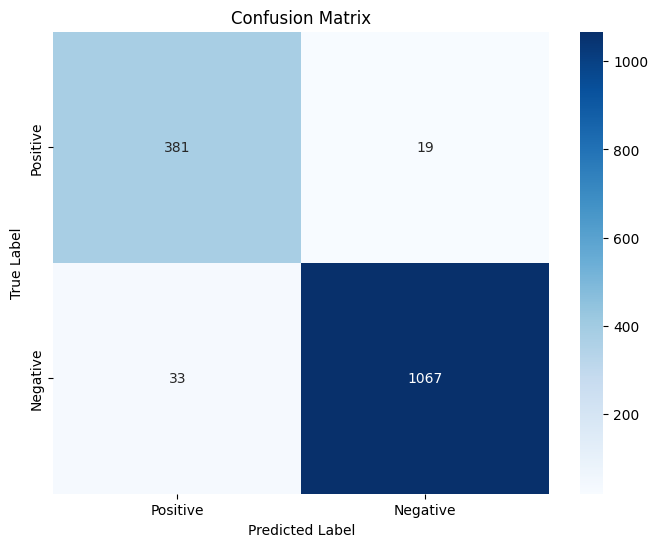

In [ ]:
!pip install scikit-learn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
true_labels_simplified = ['Positive' if 'dog' in label.lower() else 'Negative' for label in true_labels]
predicted_labels_simplified = ['Positive' if 'dog' in label.lower() else 'Negative' for label in predicted_labels]

cm = confusion_matrix(true_labels_simplified, predicted_labels_simplified, labels=['Positive', 'Negative'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#Evaluating Different Models.
**BLEU. ROUGE, Cider, SPICE**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Calculate BLEU scores for each pair of true and predicted captions
bleu_scores = [
    sentence_bleu([true.split()], predicted.split())
    for true, predicted in zip(true_labels, predicted_labels)
]

# Calculate the average BLEU score
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
average_bleu_score


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

0.021173574247324835

In [ ]:
!pip install pycocoevalcap # install the pycocoevalcap package
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

# Preparing data for CIDEr evaluation
# Modified to the correct format
true_labels_dict = {idx: [{'caption': label}] for idx, label in enumerate(true_labels)}  # Ground truth captions
predicted_labels_dict = {idx: [{'caption': caption}] for idx, caption in enumerate(predicted_labels)}  # Predicted captions

# Tokenize captions
tokenizer = PTBTokenizer()
true_labels_tokenized = tokenizer.tokenize(true_labels_dict)
predicted_labels_tokenized = tokenizer.tokenize(predicted_labels_dict)

# Initialize CIDEr scorer
cider_scorer = Cider()

# Compute CIDEr score
scores, _ = cider_scorer.compute_score(true_labels_tokenized, predicted_labels_tokenized)
print("CIDEr Score:", scores)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 7.8 MB/s eta 0:00:00
CIDEr Score: 0.6267885014408994


In [ ]:
from pycocoevalcap.spice.spice import Spice
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer

# Preparing the captions for SPICE evaluation
# Modified to the correct format
true_labels_dict = {idx: [{'caption': label}] for idx, label in enumerate(true_labels)}  # Each label is now a dictionary with a 'caption' key
predicted_labels_dict = {idx: [{'caption': caption}] for idx, caption in enumerate(predicted_labels)}  # Each caption is now a dictionary with a 'caption' key

# Tokenize captions
tokenizer = PTBTokenizer()
true_labels_tokenized = tokenizer.tokenize(true_labels_dict)
predicted_labels_tokenized = tokenizer.tokenize(predicted_labels_dict)

# Initialize SPICE scorer
spice_scorer = Spice()

# Compute SPICE score
scores, _ = spice_scorer.compute_score(true_labels_tokenized, predicted_labels_tokenized)
print(f"Average SPICE Score: {scores}")

Progress: 384.5M / 384.5M (100.0%)
Extracting stanford-corenlp-3.6.0 ...
Done.
Average SPICE Score: 0.2234152153218124
